### IMPORTING PACKAGES

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

### IMPORTING DATA

In [2]:
# Importing Data
df = pd.read_csv("8.1 Nat_Gas 1.csv")

### DATA EXPLORATION

In [3]:
# Generating dataframe shape and size
print(f"DATA EXPLORATION \nDataframe Shape: {df.shape} \nDataframe Size: ({df.size})\n")

# Generating dataframe summary
print(df.info())

# Generating dataframe preview
df.head(3)

DATA EXPLORATION 
Dataframe Shape: (48, 2) 
Dataframe Size: (96)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes
None


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0


### FEATURE ENGINEERING

In [4]:
#Converting 'Dates' column to date time format
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')

# Creating date related features from 'Dates' column
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['DayOfMonth'] = df['Dates'].dt.day
df['DayOfWeek'] = df['Dates'].dt.dayofweek
df['DayOfYear'] = df['Dates'].dt.dayofyear
# Adding a season column (1: Winter, 2: Spring, 3: Summer, 4: Fall)
df['Season'] = df['Dates'].dt.month % 12 // 3 + 1

# Displaying the updated dataframe
df.head()

,Dates,Prices,Year,Month,DayOfMonth,DayOfWeek,DayOfYear,Season
0,2020-10-31,10.1,2020,10,31,5,305,4
1,2020-11-30,10.3,2020,11,30,0,335,4
2,2020-12-31,11.0,2020,12,31,3,366,1
3,2021-01-31,10.9,2021,1,31,6,31,1
4,2021-02-28,10.9,2021,2,28,6,59,1


### DATA VISUALIZATION

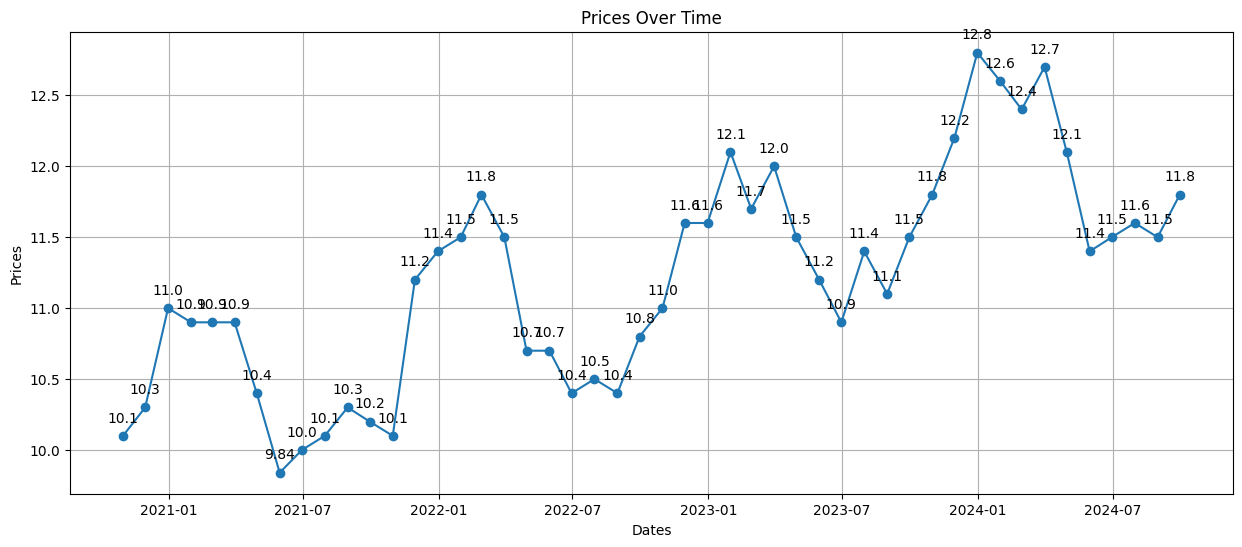

In [5]:
#Generating Lineplot Of Data
plt.figure(figsize=(15, 6))
plt.plot(df['Dates'], df['Prices'], marker='o')
for i, txt in enumerate(df['Prices']):
    plt.annotate(txt, (df['Dates'][i], df['Prices'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Prices Over Time')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.show()

### MODEL PREP

In [6]:
# Defining X and y variables
y = df["Prices"]
X = df.drop(columns=["Dates", "Prices"])

# Defining training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Displaying data split
pd.DataFrame(data={"Dimensions": [X_train.shape, 
                                  y_train.size, 
                                  X_test.shape, 
                                  y_test.size]},
             index=["X Train", "Y Train", "X Test", "Y Test"])

,Dimensions
X Train,"(38, 6)"
Y Train,38
X Test,"(10, 6)"
Y Test,10


### INITIALIZING MODELS

In [7]:
# Initializing the models
rf_model = RandomForestRegressor()
lr_model = LinearRegression()

# Fitting the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Making predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Calculating MAE and MPE for
rf_mae = round(mean_absolute_error(y_test, rf_predictions), 4)
rf_mpe = round(mean_absolute_percentage_error(y_test, rf_predictions), 4)
rf_r2 = round(r2_score(y_test, rf_predictions), 4)
lr_mae = round(mean_absolute_error(y_test, lr_predictions), 4)
lr_mpe = round(mean_absolute_percentage_error(y_test, lr_predictions), 4)
lr_r2 = round(r2_score(y_test, rf_predictions), 4)

# Previewing results
pd.DataFrame( data = {
    'Model': ['Random Forest', 'Linear Regression'],
    'MAE': [rf_mae, lr_mae],
    'MAPE': [rf_mpe, lr_mpe],
    'R²':[rf_r2, lr_r2]})

,Model,MAE,MPE,R²
0,Random Forest,0.2384,0.0208,0.8798
1,Linear Regression,0.3123,0.0273,0.8798


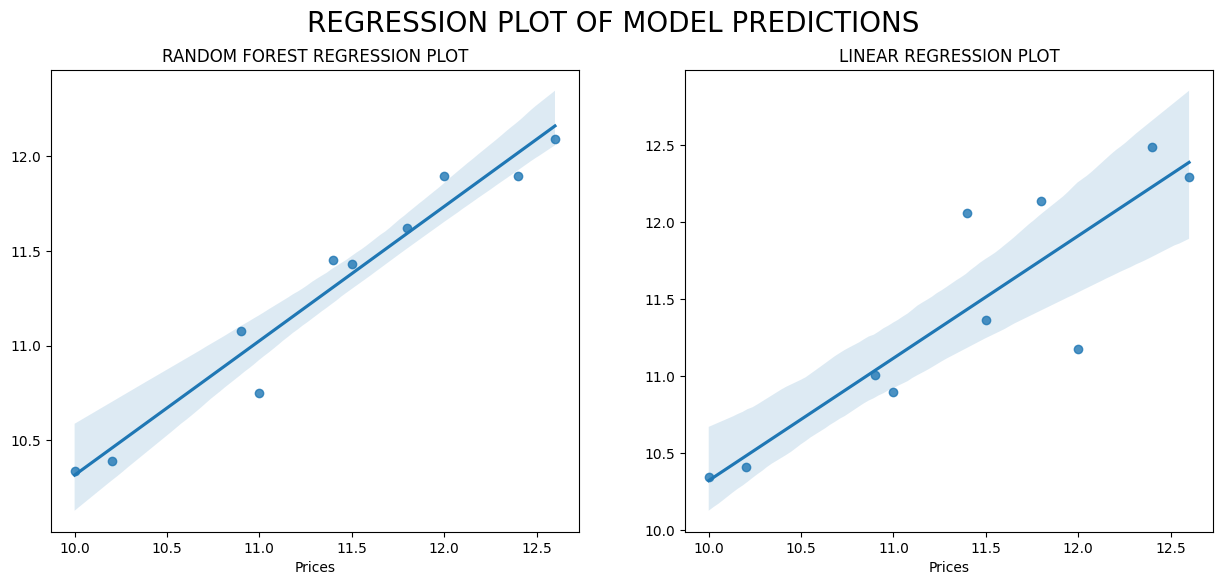

In [8]:
#Generating subplots
fig, ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle("REGRESSION PLOT OF MODEL PREDICTIONS", fontsize=20)

#Generating Visualizations
sns.regplot(x=y_test, y=rf_predictions, ax=ax[0])
sns.regplot(x=y_test, y=lr_predictions, ax=ax[1])

#Labelling subplots
ax[0].set_title("RANDOM FOREST REGRESSION PLOT")
ax[1].set_title("LINEAR REGRESSION PLOT")
plt.show()

### PRICE PREDICTION LOGIC

In [9]:
#Generating function to predict prices
def predict_price(date: str):
    # Convert the date string to a datetime object
    date = pd.to_datetime(date, format='%Y/%m/%d')
    
    # Extract features from the date
    features = {
        'Year': date.year,
        'Month': date.month,
        'DayOfMonth': date.day,
        'DayOfWeek': date.dayofweek,
        'DayOfYear': date.dayofyear,
        'Season': date.month % 12 // 3 + 1
    }
    
    # Create a DataFrame for the features
    features_df = pd.DataFrame([features])
    
    # Use the linear regression model to make a prediction
    prediction = lr_model.predict(features_df)
    
    # Print the prediction
    print(f"Predicted price for {date.strftime('%Y/%m/%d')} is {round(prediction[0], 1)}")

### PRICE PREDICTOR

In [10]:
#Input date as string in yyyy/mm/dd format
predict_price('2025/01/11')

Predicted price for 2025/01/11 is 12.9
